# <center>ベイズ推論 (Bayesian Inference)</center>
Author: 藤原 義久 <yoshi.fujiwara@gmail.com>    
### 観測データが与えられたとき，モデルのパラメータをどのように推論するか
- 例：スリッパ投げ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### 例：スリッパ投げのモデル
- モデル：表(head=H)の出る確率 $\theta$ ($0\leq\theta\leq1$)、裏の出る確率 $1-\theta$
- データ：$N$回の独立なスリッパ投げの結果　例：{H,H,T,H,...,T}=$\{x_1,x_2,\ldots,x_N\}\equiv x_{1:N}$  
このうち表が出た回数を $n_1$ とする。（したがって、裏が出た回数は$N-n_1$）

---
#### 『モデル』

In [2]:
# モデルに含まれるパラメータ
theta = 0.3

---
#### 『シミュレーション』

In [3]:
# 乱数の初期化
np.random.seed(12345)

# N回の独立なスリッパ投げ(0=裏, 1=表)
N = 1000
x = np.random.binomial(1,theta,size=N)

x

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [4]:
n1 = len(x[x==1])
print("表が出た回数= %d （裏が出た回数=%d）" % (n1,N-n1))

表が出た回数= 307 （裏が出た回数=693）


---
#### 『逆シミュレーション』
- プロット(1)：データの実現値とモデルの比較
- プロット(2)：ベイズ推定によるモデルのパラメータ推定の分布

データの個数が増えるとともにそれらの様子を見てみる

In [5]:
# モデルのパラメータに対する尤度(likelihood) = 尤も（もっとも）らしさ
def likelihood(theta,x):
    n = len(x)
    n1 = len(x[x==1])
    return (theta**n1)*(1-theta)**(n-n1)

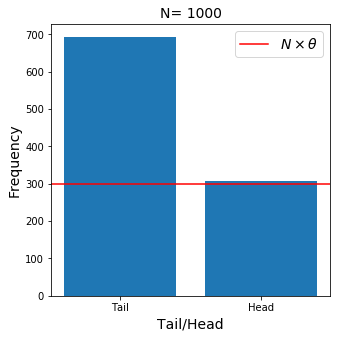

In [6]:
%matplotlib inline

plt.figure(figsize=(5,5))
plt.bar([0,1], [N-n1,n1], tick_label=["Tail","Head"])
plt.xlabel("Tail/Head", fontsize=14)
plt.ylabel("Frequency", fontsize=14);
plt.title("N= "+str(N), fontsize=14)
plt.axhline(y=N*theta, color="r", label=r"$N\times\theta$");
plt.legend(fontsize=14);

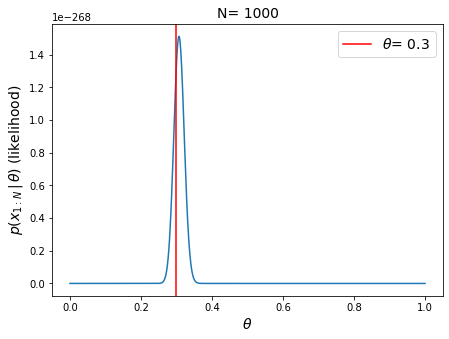

In [7]:
%matplotlib inline

p_theta = np.linspace(0.0,1.0,1000)
plt.figure(figsize=(7,5))
plt.plot(p_theta,likelihood(p_theta,x))
plt.axvline(x=theta, color="r", label=r"$\theta$= "+str(theta))
plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel(r"$p(x_{1:N}\,|\,\theta)$ (likelihood)", fontsize=14);
plt.title("N= "+str(N), fontsize=14)
plt.legend(fontsize=14);

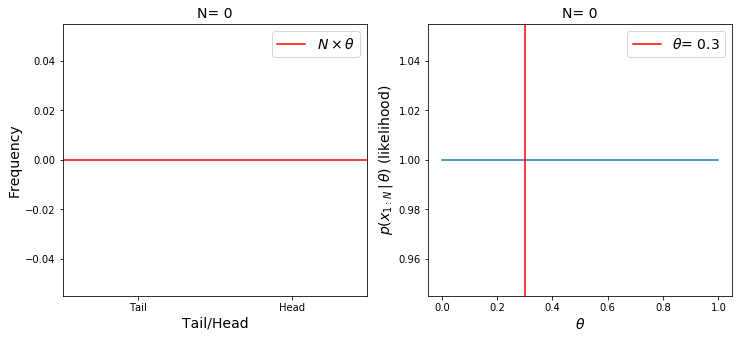

In [8]:
# Magic command for matploblib to plot interactively in another window
# Call twice to avoid a problem (https://gist.github.com/shoeffner/07c1c9ba7407684141372e2e862d0503)
%matplotlib tk
%matplotlib tk

fig, axs = plt.subplots(1,2, figsize=(12,5))

def update(frame):
    axs[0].cla()
    axs[1].cla()
    i = frame
    xi = x[0:i]
    #
    xc = [len(xi[xi==0]), len(xi[xi==1])]
    axs[0].bar([0,1],xc, tick_label=["Tail","Head"])
    axs[0].set_xlabel("Tail/Head", fontsize=14)
    axs[0].set_ylabel("Frequency", fontsize=14)
    axs[0].set_title("N= "+str(i), fontsize=14)
    axs[0].axhline(y=i*theta, color="r", label=r"$N\times\theta$");
    axs[0].legend(fontsize=14);
    #
    p_theta = np.linspace(0.0,1.0,1000)
    axs[1].plot(p_theta,likelihood(p_theta,xi))
    axs[1].axvline(x=theta, color="r", label=r"$\theta$= "+str(theta))
    axs[1].set_xlabel(r"$\theta$", fontsize=14)
    axs[1].set_ylabel(r"$p(x_{1:N}\,|\,\theta)$ (likelihood)", fontsize=14);
    axs[1].set_title("N= "+str(i), fontsize=14)
    axs[1].legend(fontsize=14);

anim = animation.FuncAnimation(fig, update, frames=range(51), interval=500)